### Decision Trees Example 1.3
We again consider the **heart** data set and grow a tree using all 13 predictors. In particular there are qualitative variables such as **Sex** or **ChestPain**.

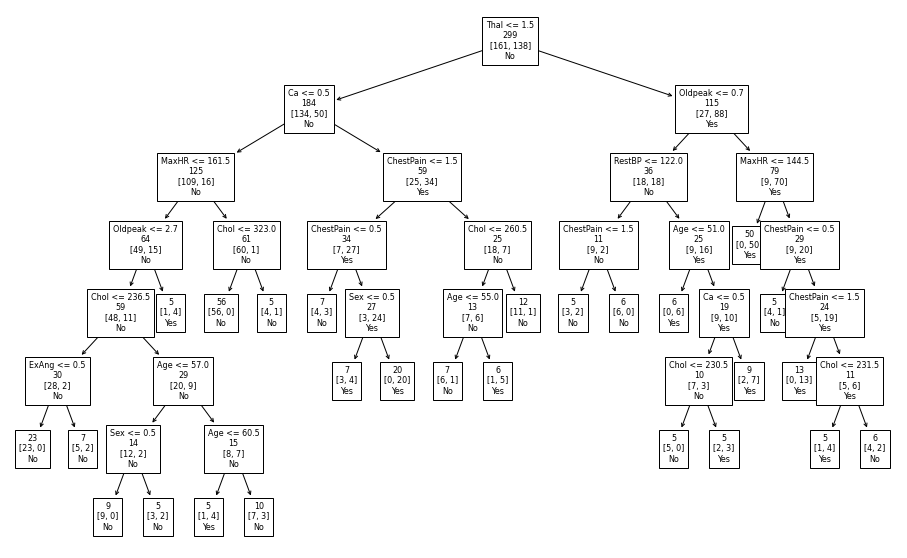

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

# Load data
df = pd.read_csv('./data/Heart.csv')

# Replace Categorical Variable with dummies
df = pd.get_dummies(data=df, columns=['AHD'], drop_first=True)
df['ChestPain'], ChestPain_codes = pd.factorize(df['ChestPain'])
df['Thal'], Thal_codes = pd.factorize(df['Thal'])
# Drop NA rows:
df.dropna(inplace=True)

# Define x and y
y = df[['AHD_Yes']]
X = df.drop(columns=['AHD_Yes'])

# Create and fit Decision tree classifier
clf = tree.DecisionTreeClassifier(criterion='entropy', 
                                  min_samples_split=10, 
                                  min_samples_leaf=5, 
                                  min_impurity_decrease=0.005)
clf = clf.fit(X, y)

# Plots
fig, ax = plt.subplots(figsize=(16, 10))

# Plot Decision Tree
tree.plot_tree(clf, ax=ax, fontsize=8, impurity=False, label='Root',
               feature_names=X.columns.values, class_names=['No', 'Yes'])
plt.show()

The resulting classification tree is shown. The first (i.e., the major) split involves the predictor **Thal**, where **Thal:b** means that the left branch coming out from that node consists of observations with the second value of **Thal** (which is **normal**). The symbol **ChestPain:bcd** means that the left branch starting from that node contains those observations of **ChestPain** that have the second, third and fourth value of **ChestPain** (which are **nonanginal**, **nontypical** and **typical**).